<a href="https://colab.research.google.com/github/hsefadere/hu-bby261-2020/blob/main/proje_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


0


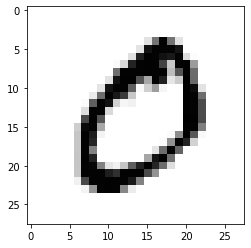

In [2]:
import matplotlib.pyplot as plt
image_index = 1 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 9
plt.imshow(x_train[image_index], cmap='Greys')

In [3]:
#print(x_train[image_index])
#x_train.shape

In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [5]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [6]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2016 - accuracy: 0.9388
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0848 - accuracy: 0.9739
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0580 - accuracy: 0.9814
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0448 - accuracy: 0.9857
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0348 - accuracy: 0.9886
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0282 - accuracy: 0.9902
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0256 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0211 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0197 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.016

In [7]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0596 - accuracy: 0.9854


[0.05960133671760559, 0.9854000210762024]

Mounted at /gdrive
['0.png', '1.png', '2.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png']
Tahmin Etmek istediğiniz resmin numarasını giriniz6
uint8
(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  72 223 223  96   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 231 255 255 247   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  72 255 255 255 151   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 231 255 255 255   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 255 255 255 151   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 

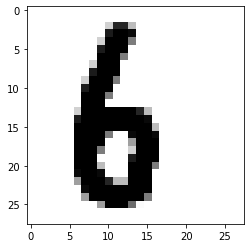

In [9]:
import matplotlib as plt
from google.colab import drive
drive.mount("/gdrive", force_remount=True)
import cv2 
import numpy as nm 
import matplotlib.pyplot as plt



def TahminEt(girilen_Sayi):
  
  sayi=cv2.imread("/gdrive/My Drive/pyödev/{}.png" .format(girilen_Sayi) ,0) 
  sayi=cv2.imread("/gdrive/My Drive/pyödev/{}.png" .format(girilen_Sayi)) 
  bin_Sayi=cv2.cvtColor(sayi,cv2.COLOR_BGR2GRAY)
  print(bin_Sayi.dtype)
  print(bin_Sayi.shape)
  print(bin_Sayi)
  plt.imshow(bin_Sayi.reshape(28, 28),cmap='Greys')
  tahmini = model.predict(bin_Sayi.reshape(1, 28, 28, 1))

  print(tahmini.argmax())
    
sayilar =["0.png", "1.png","2.png","2.png","3.png","4.png","5.png","6.png","7.png","8.png","9.png" ]
print(sayilar)
sayi_al = input("Tahmin Etmek istediğiniz resmin numarasını giriniz")
TahminEt(sayi_al)

